### calculate $V_{\pi}$ in gridworld 5x5

Example 3.5

In [1]:
import numpy as np

nx,ny=5,5
A,A_=[0,1],[4,1]
B,B_=[0,3],[2,3]
actions=[[0,-1],[-1,0],[0,1],[1,0]]#left,up,right,down
pi=0.25
gm=0.9

def step(s,a):
    if s==A:
        return A_,10
    if s==B:
        return B_,5
    
    s_=[s[0]+a[0],s[1]+a[1]]
    if s_[0]<0 or s_[0]>=nx or s_[1]<0 or s_[1]>=ny:
        r=-1
        s_=s
    else:
        r=0
        
    return s_,r

V=np.zeros((nx,ny))

while True:
    V_=np.zeros_like(V)
    for x in range(nx):
        for y in range(ny):
            va=[]
            for a in actions:
                (x_,y_),r=step([x,y],a)
                va.append(pi*(r+gm*V[x_,y_]))
            V_[x,y]=np.sum(va)

    #print(np.around(V,decimals=2))
    if np.sum(np.abs(V-V_))<1e-4:
        print(np.around(V,decimals=1))
        break
    
    V=V_

[[ 3.3  8.8  4.4  5.3  1.5]
 [ 1.5  3.   2.3  1.9  0.5]
 [ 0.1  0.7  0.7  0.4 -0.4]
 [-1.  -0.4 -0.4 -0.6 -1.2]
 [-1.9 -1.3 -1.2 -1.4 -2. ]]


### calculate $V_*$ in gridworld 5x5

Example 3.8

In [2]:
V=np.zeros((nx,ny))

while True:
    V_=np.zeros_like(V)
    for x in range(nx):
        for y in range(ny):
            va=[]
            for a in actions:
                (x_,y_),r=step([x,y],a)
                va.append(r+gm*V[x_,y_])
            V_[x,y]=np.max(va)

    #print(np.around(V,decimals=2))
    if np.sum(np.abs(V-V_))<1e-4:
        print(np.around(V,decimals=1))
        break
    
    V=V_

[[22.  24.4 22.  19.4 17.5]
 [19.8 22.  19.8 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]


### calculate $V_k$ in gridworld 4x4

4.1 Policy Evaluation - Example 4.1

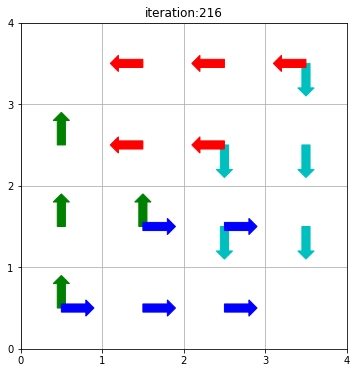

(array([[  0., -14., -20., -22.],
        [-14., -18., -20., -20.],
        [-20., -20., -18., -14.],
        [-22., -20., -14.,   0.]]),
 array([[ 0., -1., -1., -2.],
        [-1., -1., -2., -1.],
        [-1., -2., -2., -1.],
        [-2., -1., -1.,  0.]]))

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def is_terminal(s):
    return s==[0,0] or s==[nx-1,ny-1]

def step(s,a):
    if is_terminal(s):
        return s,0
    
    s_=[s[0]+a[0],s[1]+a[1]]
    
    if s_[0]<0 or s_[0]>=nx or s_[1]<0 or s_[1]>=ny:
        s_=s
        
    r=-1
    return s_,r

def plot_arrow(i,pi_op):
    scale=0.3
    x0=nx-0.5
    fig=plt.figure(figsize=(6,6))
    ax=fig.add_subplot(1,1,1)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks(np.arange(0,nx+1,1))
    ax.set_yticks(np.arange(0,ny+1,1))
    plt.grid()
    plt.ylim((0,ny))
    plt.xlim((0,nx))
    
    for (x,y), label in pi_op.items():
        #print(x,y,label) 
        if [x,y]==[0,0] or [x,y]==[nx-1,ny-1]:
            pass
        else:  
            if 1 in label: #up
                plt.arrow(y+0.5,x0-x,0,scale,width=0.1, head_width=0.2, head_length=0.1,fc='g', ec='g')
            if 3 in label: #down
                plt.arrow(y+0.5,x0-x,0,-scale,width=0.1, head_width=0.2, head_length=0.1,fc='c', ec='c')
            if 2 in label: #right
                plt.arrow(y+0.5,x0-x,scale,0,width=0.1, head_width=0.2, head_length=0.1,fc='b', ec='b')
            if 0 in label: #left
                plt.arrow(y+0.5,x0-x,-scale,0,width=0.1, head_width=0.2, head_length=0.1,fc='r', ec='r')
            plt.title('iteration:'+str(i))
    
    plt.savefig('policy_at_iter_'+str(i)+'.png',dpi=350)
    plt.show()
    plt.close()

def calc_vk(k=217,pi=0.25,gm=1):
    
    global nx,ny,actions
    nx,ny=4,4
    actions=[[0,-1],[-1,0],[0,1],[1,0]] #left, up, right, down 
    
    V=np.zeros((nx,ny))
    pi_op={}
    
    for i in range(k):
        V_=np.zeros_like(V)

        for x in range(nx):
            for y in range(ny):
                v_a=[]
                for a in actions:
                    (x_,y_),r=step([x,y],a)
                    v_a.append(pi*(r+gm*V[x_,y_]))
                V_[x,y]=np.sum(v_a)    
                pi_op[x,y]=[i for i, v in enumerate(v_a) if v == max(v_a)]

        #convergence condition
        if np.sum(np.abs(V-V_))<1e-4:
            break

        V=V_
        
    plot_arrow(i,pi_op)
               
    return np.around(V,decimals=1),pi_op

def calc_v_op(k,pi_op):
    V=np.zeros((nx,ny))
    
    for i in range(k):
        V_=np.zeros_like(V)

        for x in range(nx):
            for y in range(ny):
                v_a,pi=[0]*4,[0]*4
                for ia,a in enumerate(actions):                
                    (x_,y_),r=step([x,y],a)            
                    pi[ia]=1 if ia in pi_op[x,y] else 0    
                    v_a[ia]=pi[ia]*(r+gm*V[x_,y_])
                V_[x,y]=np.sum(v_a)    
                

        #convergence condition
        if np.sum(np.abs(V-V_))<1e-4:
            break

        V=V_
        
    return V
    
        
V_pi,pi_op=calc_vk(k=217)

V_pi_=calc_v_op(k=1,pi_op=pi_op)

V_pi,V_pi_


### Blackjack implementation with gym

Example 5.1 first-visit monte carlo with the policy: hit until 20

In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from functools import partial

plt.style.use('ggplot')

In [5]:
env=gym.make('Blackjack-v1')

#policy: hit until reach 20
#actions: 0-stick, 1-hit

def sample_policy(s):
    
    player_card, _, _ = s  
    return 0 if player_card >= 20 else 1

def mc(policy,env,n_eps,gm=1):
    
    ret_sum=defaultdict(float)
    ret_cnt=defaultdict(float)
    V=defaultdict(float)
    
    for ep in range(n_eps):
        s=env.reset()
        
        traj=[]
        done=False
        
        while not done:
            a=policy(s)
            s_,r,done,_=env.step(a)
            
            traj.append((s,a,r))     
            s=s_
            
        #get unique states
        ss=set([t[0] for t in traj])
        
        for i, s in enumerate(ss):
            
            #find first occurence of each unique state
            idx=traj.index([t for t in traj if t[0]==s][0])    
            
            #sum up all the discounted rewards starting from the first occurence
            Q=sum([t[2]*gm**i for t in traj[idx:]])
            
            ret_sum[s]+=Q
            ret_cnt[s]+=1.0
            V[s]=ret_sum[s]/ret_cnt[s]
        
    #print(ret_sum.values())
                     
    return V
                   
V_10000=mc(sample_policy,env,n_eps=10000)
V_500000=mc(sample_policy,env,n_eps=500000)
#print(V)
                   

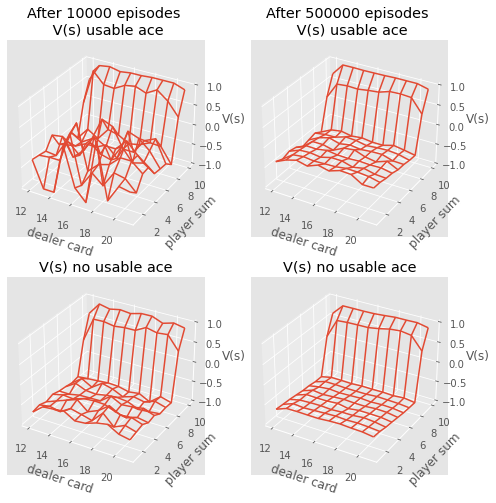

In [8]:
def plot_blackjack(V,ax1,ax2):
    player_sum=np.arange(12,21+1)
    dealer_show=np.arange(1,10+1)
    usable_ace=np.array([True,False])
    
    vs=np.zeros((len(player_sum),len(dealer_show),len(usable_ace)))
    
    for i, p in enumerate(player_sum):
        for j, d in enumerate(dealer_show):
            for k, ace in enumerate(usable_ace):
                vs[i,j,k]=V[p,d,ace]
                
    X,Y=np.meshgrid(player_sum,dealer_show)
    
    ax1.plot_wireframe(X,Y,vs[:,:,0])
    ax2.plot_wireframe(X,Y,vs[:,:,1])
    
    for ax in ax1,ax2:
        ax.set_zlim(-1,1)
        ax.set_ylabel('player sum')
        ax.set_xlabel('dealer card')
        ax.set_zlabel('V(s)')

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(8,8),subplot_kw={'projection': '3d'})

axes[0,0].set_title('After 10000 episodes \n V(s) usable ace')
axes[1,0].set_title('V(s) no usable ace')
axes[0,1].set_title('After 500000 episodes \n V(s) usable ace')
axes[1,1].set_title('V(s) no usable ace')
    
plot_blackjack(V_10000,axes[0,0],axes[1,0])
plot_blackjack(V_500000,axes[0,1],axes[1,1])

plt.savefig('blackjack_fvmc.png',dpi=350)      

